In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_random_polys(deg, num_samples, stdev=np.sqrt(0.5)):
    polys = np.random.normal(
        size=(num_samples, deg + 1, 2),
        scale=stdev
    ).view(np.complex128)[:, :, 0]
    polys[:, 0] = 1
    return polys

def get_poly_derivs(polys):
    derivs = polys[:, :-1] * np.flip(np.arange(polys.shape[1] - 1) + 1)
    return derivs

def eval_polys(polys, z):
    ret = np.zeros(polys.shape[0], dtype=polys.dtype)
    for i, poly in enumerate(polys):
        ret[i] = np.polyval(poly, z)
    
    return ret

np.random.seed(42)
polys = get_random_polys(deg=4, num_samples=2)
derivs = get_poly_derivs(polys)

print(np.poly1d(polys[0]))
print(np.poly1d(derivs[0]))
print(eval_polys(polys, 1.5))
print(eval_polys(derivs, 1.5))

   4                    3                        2
1 x + (0.458 + 1.077j) x + (-0.1656 + -0.1656j) x + (1.117 + 0.5427j) x + (-0.332 + 0.3836j)
   3                    2
4 x + (1.374 + 3.231j) x + (-0.3311 + -0.3311j) x + (1.117 + 0.5427j)
[7.57870311+4.45981422j 1.17927235-6.12594922j]
[17.21135624 +7.3153558j  10.27959581-10.10261624j]


avg_poly_log=12.234142977435518 avg_deriv_log=15.214157762802698
19.68810773851242
(17.270160507226922-9.41347635526785j) 19.66906151895833 -0.4990516421138857
CPU times: user 716 ms, sys: 57.3 ms, total: 774 ms
Wall time: 806 ms


(-20, 20)

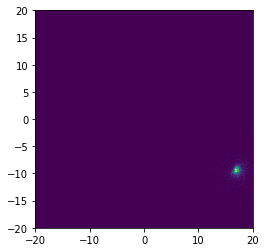

In [3]:
%%time
num_samples = 10000
polys = get_random_polys(deg=30, num_samples=num_samples)
derivs = get_poly_derivs(polys)
z = 1.5 * np.exp(1j * 0.5)

poly_vals = eval_polys(polys, z)
deriv_vals = eval_polys(derivs, z)

avg_poly_log = np.log(np.absolute(poly_vals)).sum() / num_samples
avg_deriv_log = np.log(np.absolute(deriv_vals)).sum() / num_samples
print(f"avg_poly_log={avg_poly_log} avg_deriv_log={avg_deriv_log}")
print(np.exp(avg_deriv_log - avg_poly_log))

qs = deriv_vals / poly_vals
avg_q = qs.sum() / num_samples
print(avg_q, np.absolute(avg_q), np.angle(avg_q))

plt.hist2d(
    x=qs.flatten().real,
    y=qs.flatten().imag,
    bins=1024,
)
plt.axis('square')
plt.xlim(-20, 20)
plt.ylim(-20, 20)

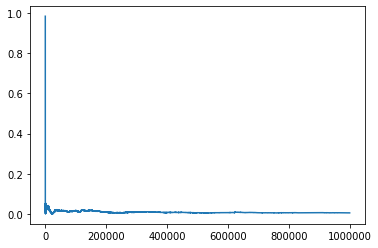

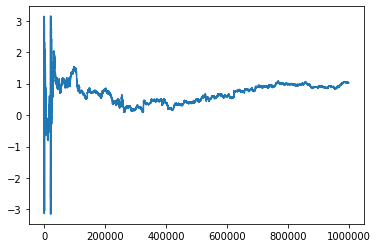

CPU times: user 15 s, sys: 306 ms, total: 15.3 s
Wall time: 14.2 s


In [20]:
%%time
num_samples = 1000000
polys = get_random_polys(deg=1, num_samples=num_samples)
#derivs = get_poly_derivs(polys)
z = 0

poly_vals = eval_polys(polys, z)
#deriv_vals = eval_polys(derivs, z)

qs = 1 / poly_vals
avg_qs = qs.cumsum() / (np.arange(qs.shape[0], dtype=np.complex128) + 1)
plt.plot(np.absolute(avg_qs))
plt.show()
plt.plot(np.angle(avg_qs))
plt.show()

In [94]:
1 / (np.arange(5) + 1)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ])